<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week1/Assignment_Modul_Minggu_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns

sales = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# nomor 1

filter_data = sales[(sales["Gender"] == "Female") & (sales["Payment"] == "Ewallet") & (sales["Branch"] == "A")]

filter_data[["Invoice ID", "Total", "Date"]].head()

,Invoice ID,Total,Date
0,750-67-8428,548.9715,1/5/2019
6,355-53-5943,433.6920,2/25/2019
12,365-64-0515,246.4875,2/12/2019
37,272-65-1806,575.3160,1/15/2019
92,873-51-0671,161.5530,1/10/2019


In [ ]:
# nomor 2

def calculate_stats(df):
  stats = df.groupby("Product line").agg(
      Total_sales = ("Total", "sum"),
      Avg_sales = ("Total", "mean"),
      Std_Quantity = ("Quantity", "std")
  )
  return stats

calculate_stats(sales)

,Total_sales,Avg_sales,Std_Quantity
Product line,,,
Electronic accessories,54337.5315,319.632538,2.909764
Fashion accessories,54305.8950,305.089298,3.102023
Food and beverages,56144.8440,322.671517,2.872388
Health and beauty,49193.7390,323.643020,2.846944
Home and lifestyle,53861.9130,336.636956,2.821741
Sports and travel,55122.8265,332.065220,2.951327


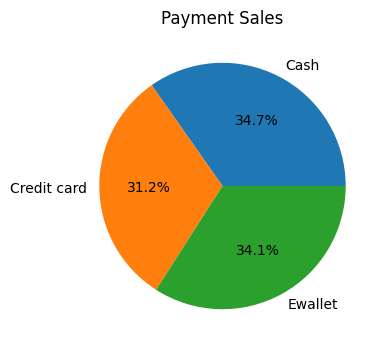

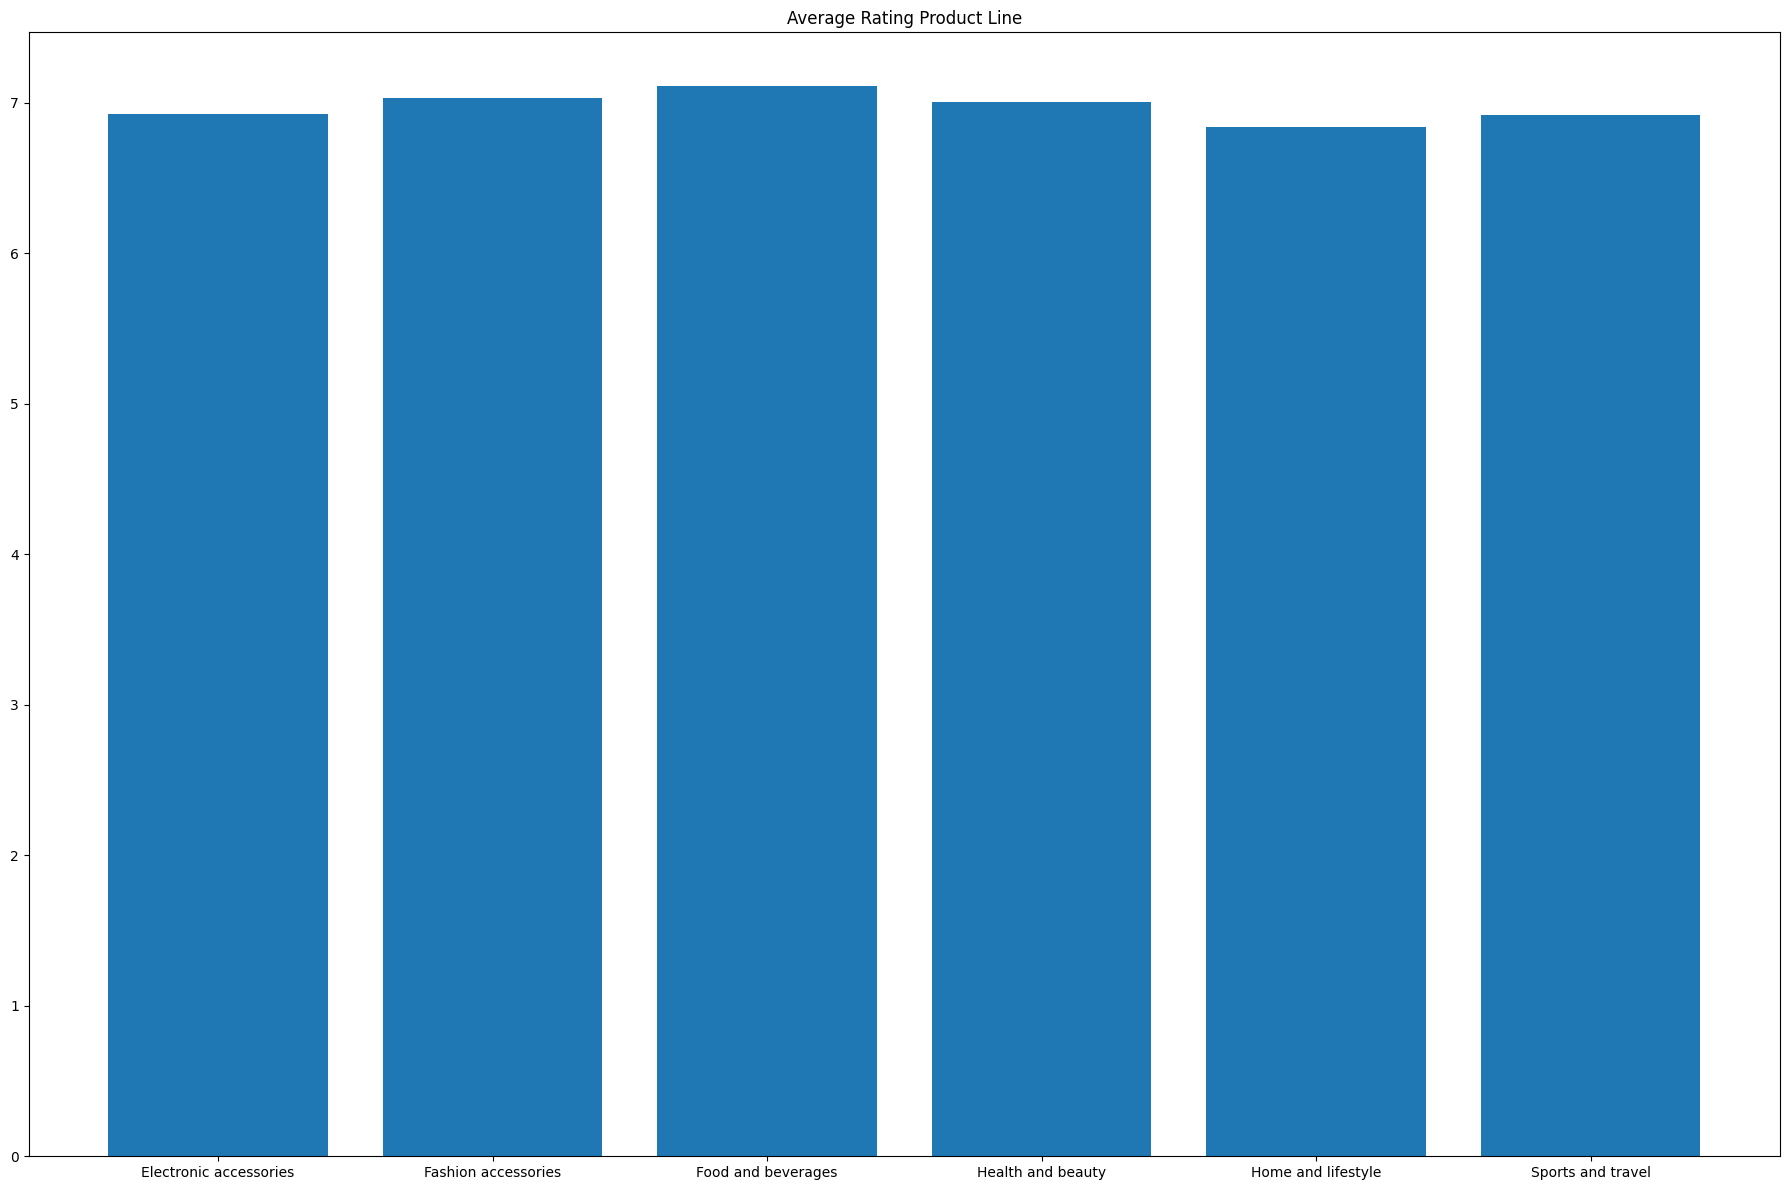

In [ ]:
# nomor 3
import matplotlib.pyplot as plt
import pandas as pd

sales = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

payment_sales = sales.groupby("Payment").agg(
    Total_sales = ("Total", "sum")
)

plt.figure(figsize = (6,4)) #figsize=(x,y)
plt.pie(payment_sales["Total_sales"], labels = payment_sales.index, autopct = "%1.1f%%")
plt.title("Payment Sales")
plt.show()

avg_rating = sales.groupby("Product line").agg(
    Avg_rating = ("Rating", "mean")
)

plt.figure(figsize = (18,12))
plt.bar(avg_rating.index, avg_rating["Avg_rating"])
plt.title("Average Rating Product Line")
plt.tight_layout()
plt.show()
